In [2]:
!pip install numpy
!pip install scikit-surprise
!pip install pandas


In [3]:
import os
import numpy as np
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
#from sklearn.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
import random
import pickle

#Para garantizar reproducibilidad en resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

In [4]:
tsv_file = r'lastfm-dataset-1K\userid-profile.tsv'
users_df = pd.read_csv(tsv_file,sep='\t')
users_df.head(10)

,#id,gender,age,country,registered
0,user_000001,m,NaN,Japan,"Aug 13, 2006"
1,user_000002,f,NaN,Peru,"Feb 24, 2006"
2,user_000003,m,22.0,United States,"Oct 30, 2005"
3,user_000004,f,NaN,NaN,"Apr 26, 2006"
4,user_000005,m,NaN,Bulgaria,"Jun 29, 2006"
5,user_000006,NaN,24.0,Russian Federation,"May 18, 2006"
6,user_000007,f,NaN,United States,"Jan 22, 2006"
7,user_000008,m,23.0,Slovakia,"Sep 28, 2006"
8,user_000009,f,19.0,United States,"Jan 13, 2007"
9,user_000010,m,19.0,Poland,"May 4, 2006"


In [5]:
tsv_file = r'lastfm-dataset-1K\userid-timestamp-artid-artname-traid-traname.tsv'
ratings_df = pd.read_csv(tsv_file,sep='\t',on_bad_lines='skip')
ratings_df.head(10)

,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,Unnamed: 4,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
0,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
1,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
2,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)
4,user_000001,2009-05-04T13:38:31Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,To Stanford (Live_2009_4_15)
5,user_000001,2009-05-04T13:33:28Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Improvisation (Live_2009_4_15)
6,user_000001,2009-05-04T13:23:45Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Glacier (Live_2009_4_15)
7,user_000001,2009-05-04T13:19:22Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Parolibre (Live_2009_4_15)
8,user_000001,2009-05-04T13:13:38Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Bibo No Aozora (Live_2009_4_15)
9,user_000001,2009-05-04T13:06:09Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,f7c1f8f8-b935-45ed-8fc8-7def69d92a10,The Last Emperor (Theme)


In [6]:
Columnas=['User_id','TimeStamp','Artist_Id','Artist_Name','Track_id','Track_Name']
ratings_df.columns=Columnas
ratings_df.head()


,User_id,TimeStamp,Artist_Id,Artist_Name,Track_id,Track_Name
0,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
1,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
2,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)
4,user_000001,2009-05-04T13:38:31Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,To Stanford (Live_2009_4_15)


In [7]:
Columnas=['Id','gender','age','country','registered']
users_df.rename(columns={'#id':'User_id'},inplace=True)
users_df.head()


,User_id,gender,age,country,registered
0,user_000001,m,NaN,Japan,"Aug 13, 2006"
1,user_000002,f,NaN,Peru,"Feb 24, 2006"
2,user_000003,m,22.0,United States,"Oct 30, 2005"
3,user_000004,f,NaN,NaN,"Apr 26, 2006"
4,user_000005,m,NaN,Bulgaria,"Jun 29, 2006"


In [8]:
artists=ratings_df[['Artist_Id','Artist_Name']]
artists_unique=artists.drop_duplicates()
artists_unique.to_csv("all_artist.csv")

In [9]:
##Guardamos el CSV para utilzarlo en la pag web
users_df.to_csv('all_users.csv') 

In [10]:
Data=pd.merge(ratings_df,users_df[['User_id','country','gender']],on='User_id',how='left')
Data.head()

,User_id,TimeStamp,Artist_Id,Artist_Name,Track_id,Track_Name,country,gender
0,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),Japan,m
1,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),Japan,m
2,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),Japan,m
3,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),Japan,m
4,user_000001,2009-05-04T13:38:31Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,To Stanford (Live_2009_4_15),Japan,m


In [11]:
#users_df.country.hist()

#users_df.sort_values(by='media', ascending=False).head(20) # top 20 items en calificaciones
df2=users_by_Country=users_df.groupby('country')['User_id'].agg({'count'})
df2.sort_values(by='count',ascending=False).head(20)

,count
country,
United States,228
United Kingdom,126
Poland,50
Germany,36
Norway,35
Finland,32
Canada,32
Turkey,28
Italy,27


In [12]:

artist_by_user=Data.groupby(['User_id','Artist_Id','Artist_Name','country','gender'])['Track_id'].agg({'count'})
artist_by_user=artist_by_user.reset_index(level=['User_id','Artist_Id','Artist_Name','country','gender'])
artist_by_user



,User_id,Artist_Id,Artist_Name,country,gender,count
0,user_000001,00c73a38-a449-4990-86ca-5088dde1b8df,Dj Rels,Japan,m,2
1,user_000001,012a77c9-c897-494f-87d0-0a730996494d,Vincent,Japan,m,1
2,user_000001,014ba96b-b8da-49e3-8a2b-b720ae42e84c,Dbx,Japan,m,3
3,user_000001,01ce7548-dab4-4ca6-8dfc-8e2e4b50d461,Lars Bartkuhn,Japan,m,4
4,user_000001,03282c56-8a24-42f4-8bfc-96188933aefa,Angela Bofill,Japan,m,4
...,...,...,...,...,...,...
691168,user_001000,ff3e120c-c929-4ad4-bbbd-04d1689ffc54,Gifts From Enola,United States,m,1
691169,user_001000,ff6e677f-91dd-4986-a174-8db0474b1799,Jack Johnson,United States,m,42
691170,user_001000,ff9deaae-da4f-42b7-a19e-36fedd3fc706,Ben Kweller,United States,m,2
691171,user_001000,ffb18e19-64a4-4a65-b4ce-979e00c3c69d,The Album Leaf,United States,m,134


In [13]:
user_listening=artist_by_user.groupby('User_id')['count'].agg('mean')
user_listening=user_listening.to_frame()
user_listening=user_listening.reset_index(level=['User_id'])
user_listening

,User_id,count
0,user_000001,20.710572
1,user_000002,44.046991
2,user_000003,20.870392
3,user_000005,18.181818
4,user_000007,4.181556
...,...,...
843,user_000996,30.850000
844,user_000997,71.690476
845,user_000998,57.877193
846,user_000999,60.934924


In [14]:
items_ratings=pd.merge(artist_by_user,user_listening,on='User_id',how='left')
items_ratings.rename(columns={'count_x':'count','count_y': 'media'},inplace=True)

In [15]:
items_ratings=pd.DataFrame(items_ratings)
items_ratings['Rating']=items_ratings['count']/items_ratings['media']
items_ratings

,User_id,Artist_Id,Artist_Name,country,gender,count,media,Rating
0,user_000001,00c73a38-a449-4990-86ca-5088dde1b8df,Dj Rels,Japan,m,2,20.710572,0.096569
1,user_000001,012a77c9-c897-494f-87d0-0a730996494d,Vincent,Japan,m,1,20.710572,0.048285
2,user_000001,014ba96b-b8da-49e3-8a2b-b720ae42e84c,Dbx,Japan,m,3,20.710572,0.144854
3,user_000001,01ce7548-dab4-4ca6-8dfc-8e2e4b50d461,Lars Bartkuhn,Japan,m,4,20.710572,0.193138
4,user_000001,03282c56-8a24-42f4-8bfc-96188933aefa,Angela Bofill,Japan,m,4,20.710572,0.193138
...,...,...,...,...,...,...,...,...
691168,user_001000,ff3e120c-c929-4ad4-bbbd-04d1689ffc54,Gifts From Enola,United States,m,1,26.605723,0.037586
691169,user_001000,ff6e677f-91dd-4986-a174-8db0474b1799,Jack Johnson,United States,m,42,26.605723,1.578608
691170,user_001000,ff9deaae-da4f-42b7-a19e-36fedd3fc706,Ben Kweller,United States,m,2,26.605723,0.075172
691171,user_001000,ffb18e19-64a4-4a65-b4ce-979e00c3c69d,The Album Leaf,United States,m,134,26.605723,5.036510


Para dismiuir el tamaño de los datos vamos seleccionar los ususarios de USA y los artistas más escuchados

In [16]:
Usa=items_ratings[(items_ratings['country']=='United States')]
Usa.head()

,User_id,Artist_Id,Artist_Name,country,gender,count,media,Rating
1790,user_000003,0039c7ae-e1a7-4a7d-9b49-0cbc716821a6,Death Cab For Cutie,United States,m,227,20.870392,10.876652
1791,user_000003,013fa897-86db-41d3-8e9f-386c8a34f4e6,Morrissey,United States,m,10,20.870392,0.479148
1792,user_000003,01809552-4f87-45b0-afff-2c6f0730a3be,Elvis Presley,United States,m,5,20.870392,0.239574
1793,user_000003,0189c612-39a5-485d-8fc2-eca025b73861,Cartel,United States,m,7,20.870392,0.335403
1794,user_000003,01b64e1d-1e61-4482-b34a-cdb6d2a47f8d,Nappy Roots,United States,m,1,20.870392,0.047915


In [17]:
paises=users_df['country'].drop_duplicates()
paises=paises.dropna()
paises=paises.to_list()

In [18]:
# se crea un modelo knnbasic item-item con similitud coseno 
sim_options = {'name': 'cosine',
               'user_based': False  # calcule similitud item-item
               }
algo = KNNBasic(k=10, min_k=2, sim_options=sim_options)

In [20]:
Valid_countries=[]
file_name=[]
for c in paises:
    c_data=items_ratings[(items_ratings['country']==c)] # Filtrar por pais
    c_artists=c_data[['Artist_Name','count']].groupby(['Artist_Name']).sum() #cuenta de prepoducciones por artista en ese país
    Q1=c_artists['count'].quantile(np.arange(.80, 1, .01)) ##deciles
    q=min(Q1) ##cuenta minima del 85% superior
    popular_artists=c_artists[c_artists['count']>=q] #filtro de artistas más populares
    popular_artists.reset_index(level=['Artist_Name'],inplace=True) #artistas populaes
    popular_artists=popular_artists['Artist_Name'].to_list() #lista de artitas populaes
    top_Data=c_data[c_data['Artist_Name'].isin(popular_artists)] #filtro solo de artias popuares en la data
    top_rating=top_Data['Rating'].max()
    reader = Reader( rating_scale = ( 0, top_rating ) )
    try:
        surprise_dataset = Dataset.load_from_df( top_Data[ [ 'User_id', 'Artist_Id', 'Rating' ] ].sample(frac=1), reader )
        train_set, test_set=  train_test_split(surprise_dataset, test_size=.2)
        algo.fit(trainset=train_set)
        pkl_filename = "model_item_item_k10"+c+".pkl"
        file_name.append(pkl_filename)
        Valid_countries.append(c)
        with open(pkl_filename, 'wb') as file:
            pickle.dump(algo, file)
    except:
        pass
    

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


C:\Users\Felipe Celis\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [23]:
valid_files_countries=pd.DataFrame(columns=['Country','file'])
valid_files_countries['Country']=Valid_countries
valid_files_countries['file']=file_name
valid_files_countries.to_csv('valid_c_f.csv') 

In [96]:
Usa_artists=Usa[['Artist_Name','count']].groupby(['Artist_Name']).sum()
#Usa_artists
Usa_artists.sort_values(by='count',ascending=False)

,count
Artist_Name,
Radiohead,36275
The Beatles,28527
Elliott Smith,24716
Death Cab For Cutie,24680
Nine Inch Nails,21427
...,...
Mr. Nash,0
Mr. No-Love,0
Mr. Pauli,0


In [97]:
Q1=Usa_artists['count'].quantile(np.arange(.9, 1, .01))
q=min(Q1)

In [98]:
popular_artists=Usa_artists[Usa_artists['count']>=q]
popular_artists.reset_index(level=['Artist_Name'],inplace=True)
popular_artists=popular_artists['Artist_Name'].to_list()
popular_artists

["'Til Tuesday",
 '(Həd) P.E.',
 '*Nsync',
 '+44',
 '...And You Will Know Us By The Trail Of Dead',
 '10 Ft. Ganja Plant',
 '10,000 Maniacs',
 '100 Demons',
 '108',
 '12 Step Rebels',
 '120 Days',
 '12012',
 '13 & God',
 '1349',
 '14 Year Old Girls',
 '16 Horsepower',
 '1905',
 '2-4 Grooves',
 '22-20S',
 '27',
 '2Pac',
 '2Wo',
 '3 Doors Down',
 '3 Inches Of Blood',
 '30 Seconds To Mars',
 '30Hz',
 '311',
 '31Knots',
 '36 Crazyfists',
 '3Oh!3',
 '3Rd Bass',
 '4 Strings',
 '400 Blows',
 '45 Grave',
 '50 Cent',
 '65Daysofstatic',
 '7 Seconds',
 '702',
 '764-Hero',
 '7L & Esoteric',
 '808 State',
 ':Wumpscut:',
 ':Zoviet*France:',
 'A Certain Ratio',
 'A Change Of Pace',
 'A Day Away',
 'A Day To Remember',
 'A Fine Frenzy',
 'A Flock Of Seagulls',
 'A Girl Called Eddy',
 'A Global Threat',
 'A Hawk And A Hacksaw',
 'A Heartwell Ending',
 'A Life Once Lost',
 'A Perfect Circle',
 'A Place To Bury Strangers',
 'A Silver Mt. Zion',
 'A Static Lullaby',
 'A Sunny Day In Glasgow',
 'A Thorn Fo

In [99]:
Usa_top=Usa[Usa['Artist_Name'].isin(popular_artists)]
Usa_top

,User_id,Artist_Id,Artist_Name,country,gender,count,media,Rating
1790,user_000003,0039c7ae-e1a7-4a7d-9b49-0cbc716821a6,Death Cab For Cutie,United States,m,227,20.870392,10.876652
1791,user_000003,013fa897-86db-41d3-8e9f-386c8a34f4e6,Morrissey,United States,m,10,20.870392,0.479148
1792,user_000003,01809552-4f87-45b0-afff-2c6f0730a3be,Elvis Presley,United States,m,5,20.870392,0.239574
1793,user_000003,0189c612-39a5-485d-8fc2-eca025b73861,Cartel,United States,m,7,20.870392,0.335403
1795,user_000003,01d3c51b-9b98-418a-8d8e-37f6fab59d8c,Sufjan Stevens,United States,m,3,20.870392,0.143744
...,...,...,...,...,...,...,...,...
691166,user_001000,fec02932-60cd-46ee-a70c-05c07905ae77,Richard Buckner,United States,m,1,26.605723,0.037586
691169,user_001000,ff6e677f-91dd-4986-a174-8db0474b1799,Jack Johnson,United States,m,42,26.605723,1.578608
691170,user_001000,ff9deaae-da4f-42b7-a19e-36fedd3fc706,Ben Kweller,United States,m,2,26.605723,0.075172
691171,user_001000,ffb18e19-64a4-4a65-b4ce-979e00c3c69d,The Album Leaf,United States,m,134,26.605723,5.036510


In [100]:
top_rating=Usa_top['Rating'].max()

In [101]:
reader = Reader( rating_scale = ( 0, top_rating ) )

In [113]:
surprise_dataset = Dataset.load_from_df( Usa_top[ [ 'User_id', 'Artist_Id', 'Rating' ] ].sample(frac=1), reader )

In [103]:
type(surprise_dataset)

surprise.dataset.DatasetAutoFolds

In [104]:
#taller_set, val_set=  train_test_split(surprise_dataset, test_size=.4)

In [105]:
train_set, test_set=  train_test_split(surprise_dataset, test_size=.2)

In [106]:
len(test_set)/train_set.n_ratings

0.25000315612730556

#Train set a guardar

In [107]:
# se crea un modelo knnbasic item-item con similitud coseno 
sim_options = {'name': 'cosine',
               'user_based': False  # calcule similitud item-item
               }
algo = KNNBasic(k=10, min_k=2, sim_options=sim_options)


In [108]:
test_set[1]

('user_000744', '324db1e6-1ec6-415c-ae5f-903b78513d3f', 0.9908448255881329)

In [109]:
#Se le pasa la matriz de utilidad al algoritmo 
algo.fit(trainset=train_set)

Computing the cosine similarity matrix...
Done computing similarity matrix.


C:\Users\Felipe Celis\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


In [111]:
#algo.predict('user_000676','5ad8fbf6-508f-4e74-808d-6e1860bdaaeb')
algo.predict('user_000744','324db1e6-1ec6-415c-ae5f-903b78513d3f')

Prediction(uid='user_000744', iid='324db1e6-1ec6-415c-ae5f-903b78513d3f', r_ui=None, est=0.4513848649901494, details={'actual_k': 10, 'was_impossible': False})

In [77]:
pkl_filename = "usa_model_item_item_k10.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(algo, file)

In [78]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [79]:
p=pickle_model.predict('user_000393','9efff43b-3b29-4082-824e-bc82f646f93d')

AttributeError: 'KNNBasic' object has no attribute 'trainset'

In [38]:
p.est

0.43015665001512765

In [128]:
test_predictions=algo.test(test_set)

In [129]:
#5 primeras predicciones
test_predictions[0:5]

[Prediction(uid='user_000703', iid='8970d868-0723-483b-a75b-51088913d3d4', r_ui=0.48769405528209014, est=1.3029718506109274, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid='user_000500', iid='1d5d9b06-1b0b-4c40-8481-bad62e03b4ab', r_ui=0.2782018659881255, est=0.6537743850720952, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid='user_000221', iid='3d2b98e5-556f-4451-a3ff-c50ea18d57cb', r_ui=1.5467353951890033, est=0.6111374488394283, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid='user_000359', iid='1582a5b8-538e-45e7-9ae4-4099439a0e79', r_ui=0.12813511611541167, est=0.8664268938112668, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid='user_000382', iid='f035837e-4117-438d-a524-cacf43500e68', r_ui=2.5324384787472036, est=1.3589245765420261, details={'actual_k': 20, 'was_impossible': False})]

In [130]:
accuracy.rmse( test_predictions, verbose = True )

RMSE: 3.8392


3.839151783449756

Iteración de vecinos para evaluar calidad del Modelo

In [137]:
n=range(10,40)
a=[]
for v in n:
  
  # se crea un modelo knnbasic item-item con similitud coseno 
  sim_options_uu = {'name': 'pearson',
                'user_based': True  # calcule similitud item-item
                }
  algo_uu = KNNBasic(k=v, min_k=2, sim_options=sim_options_uu)

  #Se le pasa la matriz de utilidad al algoritmo 
  algo_uu.fit(trainset=train_set)

  test_predictions_uu=algo_uu.test(test_set)
  a.append([accuracy.rmse( test_predictions_uu, verbose = True ),v])
Results_pearson=pd.DataFrame(a,columns=['RMSE','Neighbors'])
Results_pearson

Computing the pearson similarity matrix...


C:\Users\Felipe Celis\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in sqrt
  sim = construction_func[name](*args)


Done computing similarity matrix.
RMSE: 3.8108
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.8002
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.7936
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.7899
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.7873
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.7853
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.7819
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.7800
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.7784
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.7769
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.7751
Computing the pearson similarity matrix...
Done compu

,RMSE,Neighbors
0,3.810830,10
1,3.800200,11
2,3.793558,12
3,3.789903,13
4,3.787326,14
5,3.785265,15
6,3.781940,16
7,3.779990,17
8,3.778367,18
9,3.776904,19


<AxesSubplot:xlabel='Neighbors', ylabel='RMSE'>

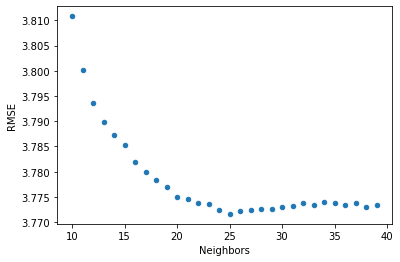

In [138]:
Results_pearson.plot.scatter(x='Neighbors',y='RMSE')

Los cambios en El valor RMSE, no son significativos en con el # de Vecinos

In [139]:
n=range(10,40)
a=[]
for v in n:
  
  # se crea un modelo knnbasic item-item con similitud coseno 
  sim_options_uu = {'name': 'cosine',
                'user_based': True  # calcule similitud item-item
                }
  algo_uu = KNNBasic(k=v, min_k=2, sim_options=sim_options_uu)

  #Se le pasa la matriz de utilidad al algoritmo 
  algo_uu.fit(trainset=train_set)

  test_predictions_uu=algo_uu.test(test_set)
  a.append([accuracy.rmse( test_predictions_uu, verbose = True ),v])
Results_cosine=pd.DataFrame(a,columns=['RMSE','Neighbors'])
Results_cosine

Computing the cosine similarity matrix...


C:\Users\Felipe Celis\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
RMSE: 3.7558
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.7452
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.7353
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.7284
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.7264
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.7213
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.7184
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.7170
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.7161
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.7150
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.7158
Computing the cosine similarity matrix...
Done computing simila

,RMSE,Neighbors
0,3.755844,10
1,3.745190,11
2,3.735312,12
3,3.728377,13
4,3.726381,14
5,3.721291,15
6,3.718386,16
7,3.716991,17
8,3.716052,18
9,3.714957,19


<AxesSubplot:xlabel='Neighbors', ylabel='RMSE'>

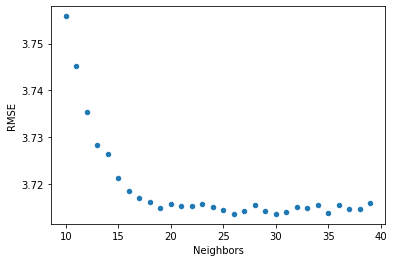

In [140]:
Results_cosine.plot.scatter(x='Neighbors',y='RMSE')

Item Item

In [141]:
n=range(10,20)
a=[]
for v in n:
  
  # se crea un modelo knnbasic item-item con similitud coseno 
  sim_options_uu = {'name': 'pearson',
                'user_based': False  # calcule similitud item-item
                }
  algo_uu = KNNBasic(k=v, min_k=2, sim_options=sim_options_uu)

  #Se le pasa la matriz de utilidad al algoritmo 
  algo_uu.fit(trainset=train_set)

  test_predictions_uu=algo_uu.test(test_set)
  a.append([accuracy.rmse( test_predictions_uu, verbose = True ),v])
Results_pearson_item=pd.DataFrame(a,columns=['RMSE','Neighbors'])
Results_pearson_item

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.9080
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.8936
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.8864
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.8793
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.8695
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.8644
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.8591
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.8539
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.8479
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.8436
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 3.8392
Computing 

,RMSE,Neighbors
0,3.907999,10
1,3.893624,11
2,3.886362,12
3,3.879288,13
4,3.869549,14
5,3.864425,15
6,3.859130,16
7,3.853857,17
8,3.847948,18
9,3.843556,19


<AxesSubplot:xlabel='Neighbors', ylabel='RMSE'>

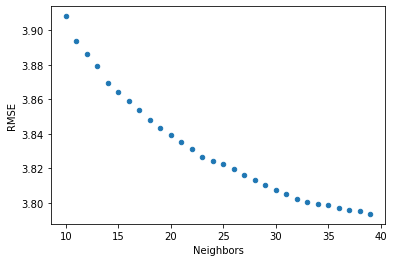

In [142]:
Results_pearson_item.plot.scatter(x='Neighbors',y='RMSE')

In [143]:
n=range(10,25)
a=[]
for v in n:
  
  # se crea un modelo knnbasic item-item con similitud coseno 
  sim_options_uu = {'name': 'cosine',
                'user_based': False  # calcule similitud item-item
                }
  algo_uu = KNNBasic(k=v, min_k=2, sim_options=sim_options_uu)

  #Se le pasa la matriz de utilidad al algoritmo 
  algo_uu.fit(trainset=train_set)

  test_predictions_uu=algo_uu.test(test_set)
  a.append([accuracy.rmse( test_predictions_uu, verbose = True ),v])
Results_cosine_item=pd.DataFrame(a,columns=['RMSE','Neighbors'])
Results_cosine_item

Computing the cosine similarity matrix...


C:\Users\Felipe Celis\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
RMSE: 3.9139
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.9030
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.8908
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.8808
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.8733
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.8704
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.8654
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.8602
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.8540
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.8510
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.8474
Computing the cosine similarity matrix...
Done computing simila

KeyboardInterrupt: 

In [ ]:
Results_cosine_item.plot.scatter(x='Neighbors',y='RMSE')

In [25]:
a=pd.read_csv("all_users.csv")
a.head()

,Unnamed: 0,User_id,gender,age,country,registered
0,0,user_000001,m,NaN,Japan,"Aug 13, 2006"
1,1,user_000002,f,NaN,Peru,"Feb 24, 2006"
2,2,user_000003,m,22.0,United States,"Oct 30, 2005"
3,3,user_000004,f,NaN,NaN,"Apr 26, 2006"
4,4,user_000005,m,NaN,Bulgaria,"Jun 29, 2006"


In [71]:
entrada='user_001000'

In [72]:
selected_user=a[a["User_id"]==entrada]
selected_user

,Unnamed: 0,User_id,gender,age,country,registered
991,991,user_001000,m,NaN,United States,"Mar 24, 2007"


In [77]:
country_user=selected_user['country'].to_list()
country_user=country_user[0]

In [78]:
v=pd.read_csv("valid_c_f.csv")

In [79]:
valid_country=1==(v[v['Country']==country_user].shape[0])

In [82]:
nombre_file=v[v['Country']==country_user]['file'].to_list()
nombre_file=nombre_file[0]

In [49]:
with open(nombre_file, 'rb') as file:
    pickle_model = pickle.load(file)

p=pickle_model.predict('user_000393','9efff43b-3b29-4082-824e-bc82f646f93d')

In [50]:
p.est

3.6196271738345103

In [22]:
is_user=1==selected_user.shape[0]
is_user

False

In [51]:
b=pd.read_csv("all_artist.csv")
b.head()

,Unnamed: 0,Artist_Id,Artist_Name
0,0,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一
1,13,ba2f4f3b-0293-4bc8-bb94-2f73b5207343,Underworld
2,15,a16e47f5-aa54-47fe-87e4-bb8af91a9fdd,Ennio Morricone
3,16,463a94f1-2713-40b1-9c88-dcc9c0170cae,Minus 8
4,17,ad0811ea-e213-451d-b22f-fa1a7f9e0226,Beanfield


In [60]:
selected_artist="Underworld"
selected_artist=b[b["Artist_Name"]==selected_artist]
is_artist=1==selected_artist.shape[0]
is_artist

True

In [69]:
artist_name=selected_artist['Artist_Id'].to_list()

In [70]:
artist_name[0]

'ba2f4f3b-0293-4bc8-bb94-2f73b5207343'